In [1]:
# Import the dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier

# dataframe to image library
import dataframe_image as dfi

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the CSV file from the folder into pandas DataFrame
diabetes_data= pd.read_csv("Resources/diabetes_prediction_sqlite.csv")
diabetes_data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
# saving the dataframe as image
dfi.export(diabetes_data[:10],'Dataframe_image.png')

In [4]:
# check the dimensions or no of rows n columns
diabetes_data.shape

(100000, 9)

### Seaborn Pairplot

In [5]:
# sns.pairplot(diabetes_data, hue="diabetes")
# plt.savefig("pairplot.png")
# plt.show()

Assigning a hue variable adds a semantic mapping and changes the default marginal plot to a layered kernel density estimate (KDE)

In [6]:
# Explore the data
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
#check for null values in dataset
diabetes_data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

There are total 100000 rows and 9 columns in this dataset.

This database includes Features:- object, float, and integer types.

Database don’t have any NaN values

In diabetes column,

     0 represents:- Doesn’t have diabetes(Absence of diabetes),
     1 represents:- Has diabetes(Presence of diabetes).

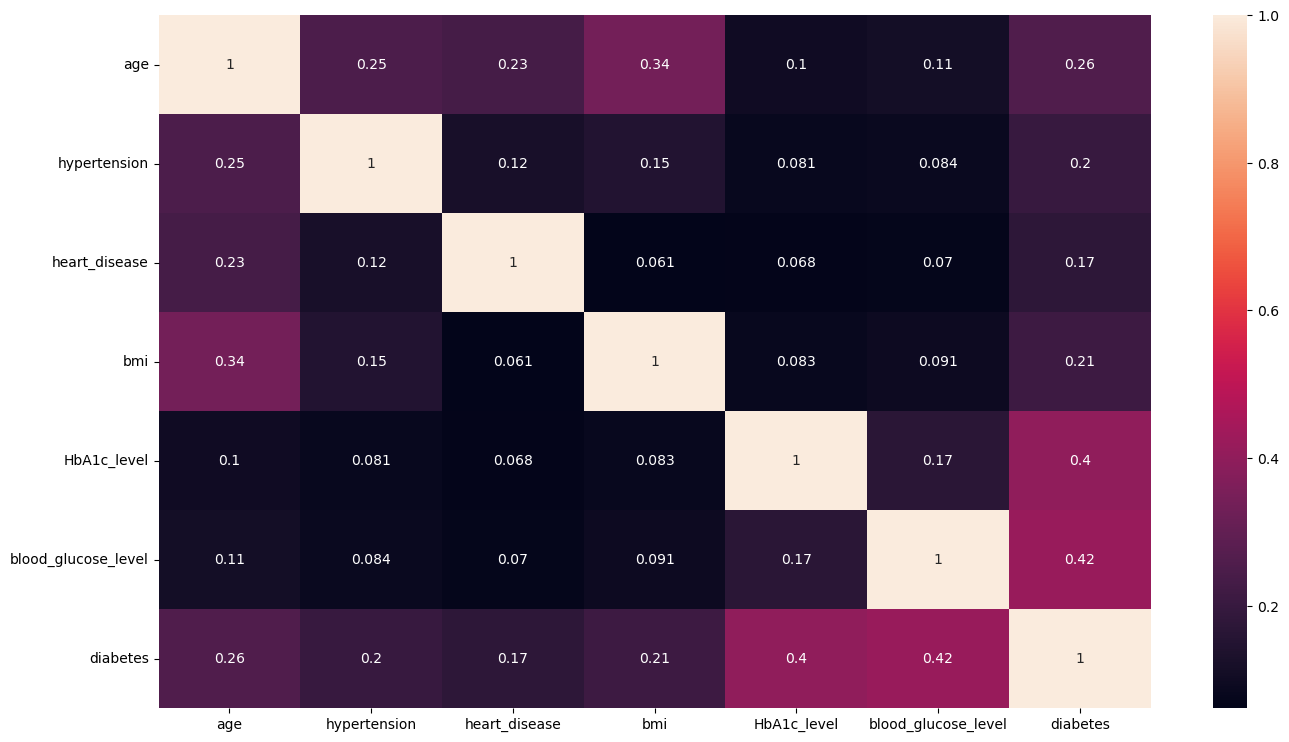

In [8]:

# Heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(diabetes_data.corr(), annot=True)
plt.show("Heatmap")

### As per the above heatmap, this dataset displays significant imbalance, with a higher count of individual without diabetes compared to those with who have diabetes.

Diabetes has high linear correlationship with blood_glucose_level and HbA1c_level.

In [9]:
# Check the correlation
diabetes_data.corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


In [10]:
# Check the mix of target variables
# diabetes_absence_count = len(diabetes_df.loc[diabetes_df['diabetes'] == 0])
# diabetes_present_count = len(diabetes_df.loc[diabetes_df['diabetes'] == 1])
# (diabetes_absence_count, diabetes_present_count)
target = diabetes_data["diabetes"].value_counts()
target

0    91500
1     8500
Name: diabetes, dtype: int64

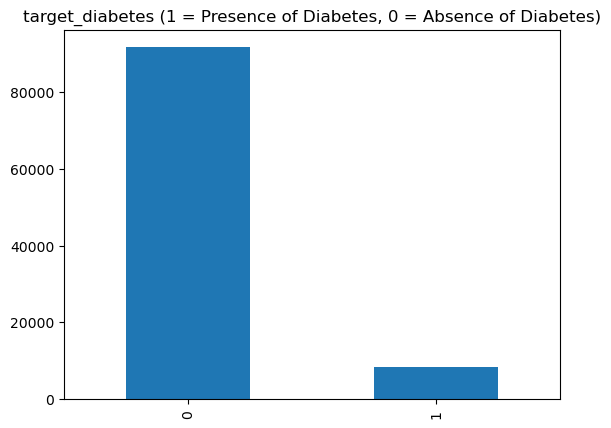

In [11]:
# bar chart
target.plot(kind = 'bar')
plt.title("target_diabetes (1 = Presence of Diabetes, 0 = Absence of Diabetes)")
# save fig
plt.savefig('imbalanced_target.png')
plt.show()

### CLEANING THE DATA or Data Preprocessing

As gender is an object we are converting it into integer(Changing datatype)

In [12]:
# Change gender column values to 0, 1, 2
diabetes_data["gender"].replace({"Female": 0, "Male": 1, "Other": 2}, inplace = True)

In [13]:
# Change Smoking histoy columns to -1, 0, 1, 2, 3, 4
#diabetes_df["smoking_history"].replace({'No Info':-1,'never':0,'former':1,'current':2,'not current':3,'ever':4}, inplace = True)

In [14]:
# count of all unique values
diabetes_data["smoking_history"].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

As Smoking_history doesn't have enough information or No info provided we are dropping the column

In [15]:
# Dropping the column smoking_history
diabetes_data.drop(columns='smoking_history', axis=1, inplace=True)
diabetes_data

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,25.19,6.6,140,0
1,0,54.0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,27.83,5.7,155,0
99998,0,24.0,0,0,35.42,4.0,100,0


In [16]:
# crating a new dataframe after cleaning
diabetes_df = diabetes_data
diabetes_df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,25.19,6.6,140,0
1,0,54.0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,27.83,5.7,155,0
99998,0,24.0,0,0,35.42,4.0,100,0


In [17]:
# saving the new dataframe after cleaning
dfi.export(diabetes_df[:10],'Dataframe_cleaned_image.png')

In [18]:
# Explore the new dataframe
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   bmi                  100000 non-null  float64
 5   HbA1c_level          100000 non-null  float64
 6   blood_glucose_level  100000 non-null  int64  
 7   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 6.1 MB


In [19]:
# Determine the number of unique values in each column
diabetes_df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [20]:
# Look at gender for binning
gender_counts = diabetes_df["gender"].value_counts()
gender_counts

0    58552
1    41430
2       18
Name: gender, dtype: int64

In [21]:
diabetes_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [22]:
# Separate the data into labels and features
X = diabetes_df.drop(columns = "diabetes")

# Separate the y variable, the labels
y = diabetes_df["diabetes"]

# Separate the X variable, the features
X.shape

(100000, 7)

In [23]:
# Review the y variable
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [24]:
# Review the X variable DataFrame
X

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,25.19,6.6,140
1,0,54.0,0,0,27.32,6.6,80
2,1,28.0,0,0,27.32,5.7,158
3,0,36.0,0,0,23.45,5.0,155
4,1,76.0,1,1,20.14,4.8,155
...,...,...,...,...,...,...,...
99995,0,80.0,0,0,27.32,6.2,90
99996,0,2.0,0,0,17.37,6.5,100
99997,1,66.0,0,0,27.83,5.7,155
99998,0,24.0,0,0,35.42,4.0,100


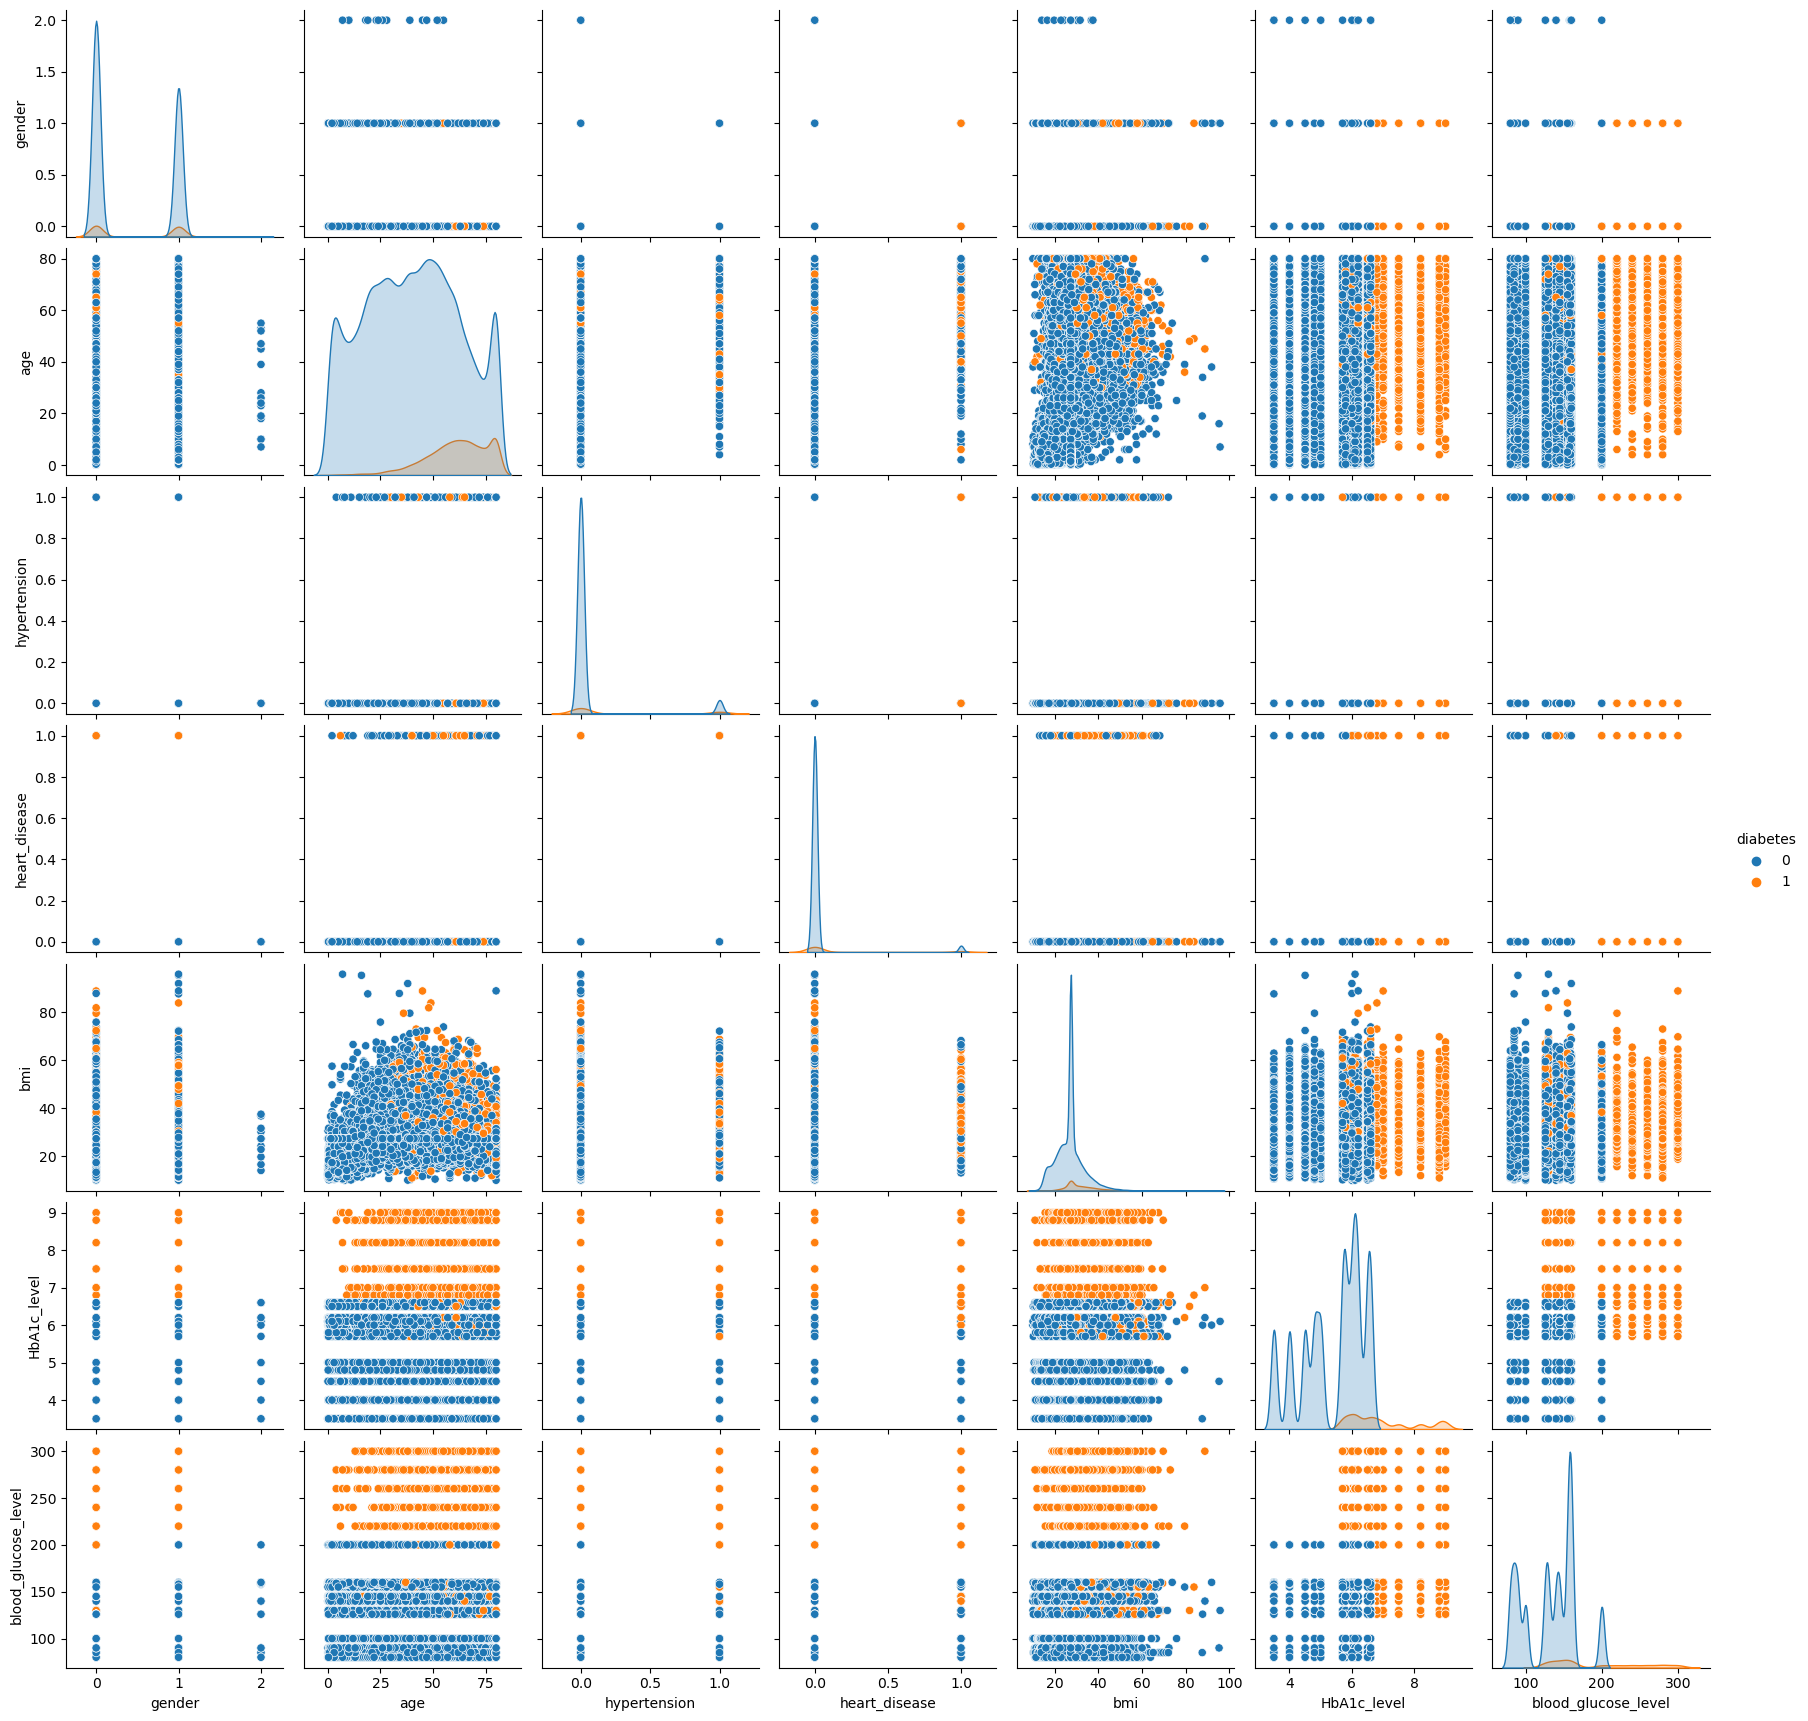

In [25]:
sns.pairplot(diabetes_df, hue="diabetes")
plt.savefig("pairplot_cleaned.png")
plt.show()

In [26]:
# Check the balance of our target values
y.value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

Considering the Diabetes as the target, we could see there is a huge imbalance in its classes.

In [28]:
diabetes_df.groupby('diabetes').mean()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,,,,
0,0.409038,40.115187,0.058984,0.029235,26.887163,5.396761,132.852470
1,0.475176,60.946588,0.245647,0.149059,31.988382,6.934953,194.094706


People with diabetes have higher 'indicators'.

TRAIN TEST SPLIT

In [29]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify = y)

In [30]:
# Checking dimensions
print(f"X_train shape:", X_train.shape)
print(f"X_test shape:", X_test.shape)
print(f"y_train shape:", y_train.shape)
print(f"y_test shape:", y_test.shape)


X_train shape: (75000, 7)
X_test shape: (25000, 7)
y_train shape: (75000,)
y_test shape: (25000,)


### Scale Data

In [31]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [32]:
# Fitting StandardScaler
X_scaler = scaler.fit(X_train)

In [33]:
#scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


### Lets see how this imbalance can effect the accuracy

### DATA MODELING/ MACHINE LEARNING ALGORITHMS

In [34]:
# Import the LogisticRegression module from sklearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression Model
# Assign a random_state parameter of 1 to the model
LogReg = LogisticRegression(random_state = 1)

# Fit the model using training data
LogReg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1)

In [35]:
# Make the prediction using the training and testing data
y_pred = LogReg.predict(X_test)

print(f"Training Data Score: {LogReg.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {LogReg.score(X_test_scaled, y_test)}")

Training Data Score: 0.9603466666666667
Testing Data Score: 0.9598


In [36]:
# k nearest neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p =2)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=24)

In [37]:
# Support Vector Classifier Algorithm
svc = SVC(kernel = 'linear', random_state = 1)
svc.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=1)

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 1)
rf_model.fit(X_train_scaled, y_train.ravel())

RandomForestClassifier(random_state=1)

In [39]:
# Making predictions on test dataset

y_pred_LogReg = LogReg.predict(X_test_scaled)
y_pred_knn = knn.predict(X_test_scaled)
y_pred_svc = svc.predict(X_test_scaled)
y_pred_rf_model = rf_model.predict(X_test_scaled)

In [40]:
# Evaluating using balanced_accuracy_score metric
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_LogReg = balanced_accuracy_score(y_test, y_pred_LogReg)
balanced_accuracy_knn = balanced_accuracy_score(y_test, y_pred_knn)
balanced_accuracy_svc = balanced_accuracy_score(y_test, y_pred_svc)
balanced_accuracy_rf_model = balanced_accuracy_score(y_test, y_pred_rf_model)

In [41]:
# Accuracy on test set
print(f"LogisticRegression:" + str(balanced_accuracy_LogReg))
print(f"K Nearest Neighbors:" + str(balanced_accuracy_knn))
print(f"Support Vector Classifier:" + str(balanced_accuracy_svc))
print(f"Random Forest Classifier:" + str(balanced_accuracy_rf_model))

LogisticRegression:0.8045091610414657
K Nearest Neighbors:0.7912182577949212
Support Vector Classifier:0.7876361298617808
Random Forest Classifier:0.8442275795564127


### Confusion Matrix for all the models

In [42]:
# Generate a confusion matrix for the SVC model
confusion_matrix(y_test, y_pred_svc)

array([[22783,    92],
       [  894,  1231]], dtype=int64)

In [43]:
# Generate a confusion matrix for the LogReg model

confusion_matrix(y_test, y_pred_LogReg)

array([[22683,   192],
       [  813,  1312]], dtype=int64)

In [44]:
# Generate a confusion matrix for the random forest model

confusion_matrix(y_test, y_pred_rf_model)

array([[22767,   108],
       [  652,  1473]], dtype=int64)

In [45]:
# Generate a confusion matrix for the KNN model
confusion_matrix(y_test, y_pred_knn)

array([[22850,    25],
       [  885,  1240]], dtype=int64)

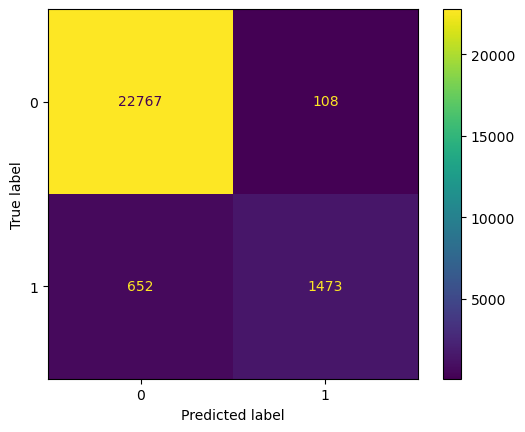

<Figure size 640x480 with 0 Axes>

In [46]:
# View confusionmatrix display for Random Forest Model
# follow documentation to generate ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf_model)
disp = confusion_matrix(y_test, y_pred_rf_model, labels = rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf_model.classes_)
disp.plot()
plt.show()
plt.savefig("Confusion_matrix.png")

In [47]:
#print the classification report for the model
target_names = ["Doesn't have Diabetes", "Has Diabetes", ]
print(classification_report(y_test, y_pred_rf_model, target_names = target_names))

                       precision    recall  f1-score   support

Doesn't have Diabetes       0.97      1.00      0.98     22875
         Has Diabetes       0.93      0.69      0.79      2125

             accuracy                           0.97     25000
            macro avg       0.95      0.84      0.89     25000
         weighted avg       0.97      0.97      0.97     25000



### Examine results for Resampler target using RandomOverSampler

In [48]:
# Import the RandomOverSampler module from imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the Random oversampler model
# Assign a random_state parameter of 1 to the model
random_oversampler_model = RandomOverSampler(random_state = 1)

# Fit the original training data to the random_oversampler model
X_resample, y_resample = random_oversampler_model.fit_resample(X_train, y_train)


In [49]:
# Count the distinct values of the resampled labels data
y_resample.value_counts()

0    68625
1    68625
Name: diabetes, dtype: int64

In [50]:
target1 = y_resample.value_counts()
target1

0    68625
1    68625
Name: diabetes, dtype: int64

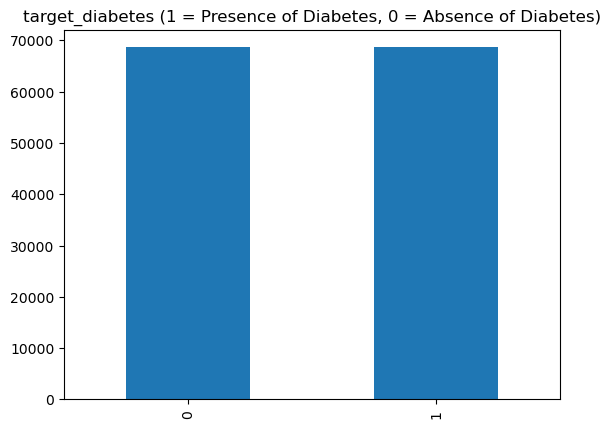

In [51]:
# bar chart
target1.plot(kind = 'bar')
plt.title("target_diabetes (1 = Presence of Diabetes, 0 = Absence of Diabetes)")
# save fig
plt.savefig('balanced_target.png')
plt.show()

After using the Random Over Sampler we could see the target has same samples of Presence and absence of diabetes.

In [52]:
# Instantiate the LogisticRegression model
# Assign a random_state parameter of 1 to the model

Resampled_model = LogisticRegression(random_state = 1)

# Fit the model using the resampled training data
Resampled_model.fit(X_resample, y_resample)

# Make a prediction using the testing data
y_pred_LogReg = Resampled_model.predict(X_test)

In [53]:
Final_results = pd.DataFrame({"prediction": y_pred_LogReg, "Actual": y_test}).reset_index(drop = True)
Final_results.head(100)

,prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,0,0
96,0,0
97,0,0
98,0,0


In [54]:
# Print the balanced accuracy score of the LogReg model
balanced_accuracy_score(y_test, y_pred_LogReg)

0.8815249116039858

In [55]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, y_pred_LogReg)

array([[20372,  2503],
       [  271,  1854]], dtype=int64)

In [56]:
# Print the classification report for the Logistic Regression model
print(classification_report(y_test, y_pred_LogReg, target_names = ["Doen't have Diabetes", "Has Diabetes", ]))

                      precision    recall  f1-score   support

Doen't have Diabetes       0.99      0.89      0.94     22875
        Has Diabetes       0.43      0.87      0.57      2125

            accuracy                           0.89     25000
           macro avg       0.71      0.88      0.75     25000
        weighted avg       0.94      0.89      0.91     25000



In [57]:
# Instantiate the RandomForest model
# Assign a random_state parameter of 1 to the model

Resampled_rf_model = RandomForestClassifier(random_state = 1)

# Fit the model using the resampled training data
Resampled_rf_model.fit(X_resample, y_resample)

# Make a prediction using the testing data
y_pred_rf_model = Resampled_model.predict(X_test)

In [58]:
# classification report for RandomForestClasiifier
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf_model))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     22875
           1       0.43      0.87      0.57      2125

    accuracy                           0.89     25000
   macro avg       0.71      0.88      0.75     25000
weighted avg       0.94      0.89      0.91     25000



In [59]:
# Check Accuracy score for RandomForest
balanced_accuracy_score(y_test, y_pred_rf_model)

0.8815249116039858

In [60]:
# Generate confusion matrix for RandomForest
confusion_matrix(y_test, y_pred_rf_model)

array([[20372,  2503],
       [  271,  1854]], dtype=int64)

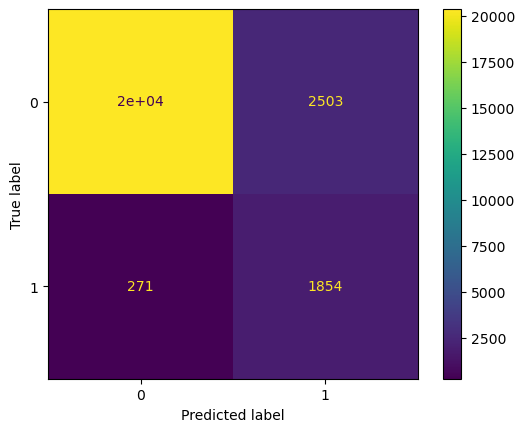

<Figure size 640x480 with 0 Axes>

In [61]:
# View Confusion matrix display for Random Forest Classifier
# Follow documentation to generate ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_rf_model)
disp = confusion_matrix(y_test, y_pred_rf_model, labels = rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf_model.classes_)
disp.plot()
plt.show()
plt.savefig("Confusion_matrix_rf.png")

In [62]:
models={
    "LogisticRegression": LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "SVC": SVC(),
    "RandomForest": RandomForestClassifier()
}

### Using SMOTE

In [63]:
from sklearn.metrics import accuracy_score
sm=SMOTE()
X_train_sm, y_train_sm=sm.fit_resample(X_train, y_train)
accuracies=[]
for name, model in models.items():
    model.fit(X_train_sm, y_train_sm)
    y_pred=model.predict(X_test)

    AS=accuracy_score(y_test, y_pred)
    RAS=roc_auc_score(y_test, y_pred)
    accuracies.append(AS)

    print(f'Results for {name}')
    print('Accuracy score:', AS)
    print('roc_auc_score:', RAS)

    print()

Results for LogisticRegression
Accuracy score: 0.88592
roc_auc_score: 0.8697884924461587

Results for KNeighborsClassifier
Accuracy score: 0.89792
roc_auc_score: 0.8421960784313726

Results for SVC
Accuracy score: 0.8768
roc_auc_score: 0.891057537769206

Results for RandomForest
Accuracy score: 0.95824
roc_auc_score: 0.8514664095146255



### Random Forest Feature Importance Plot

In [64]:
# splitting data into train and test sets
X_train, X_test, y_train,y_test = train_test_split(X, y, random_state = 1)

In [65]:
rf_model = RandomForestClassifier(n_estimators = 500, random_state = 1)

In [66]:
rf_model = rf_model.fit(X_train_scaled, y_train)

In [67]:
predictions_rf = rf_model.predict(X_test_scaled)

In [68]:
importances = rf_model.feature_importances_
sorted(zip(rf_model.feature_importances_, X.columns), reverse= True)

[(0.43973359688574903, 'bmi'),
 (0.2940191107726073, 'age'),
 (0.1247458314207586, 'blood_glucose_level'),
 (0.11898847903876007, 'HbA1c_level'),
 (0.014057950451756838, 'gender'),
 (0.004414355996895105, 'hypertension'),
 (0.0040406754334729855, 'heart_disease')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

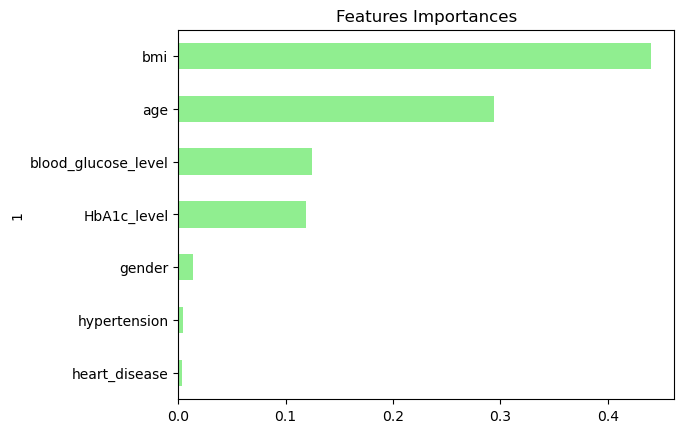

In [69]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 10)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.96988